# LightGBM을 사용한 ML

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv('../../eda/data/merged_data.csv')

In [215]:
df.head()

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00_06_매출_금액,시간대_06_11_매출_금액,시간대_11_14_매출_금액,시간대_14_17_매출_금액,시간대_17_21_매출_금액,시간대_21_24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,상권_변화_지표,운영_영업_개월_평균,폐업_영업_개월_평균,서울시_운영_영업_개월_평균,서울시_폐업_영업_개월_평균,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,월_평균_소득_금액,지출_총_금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액,전체임대료,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_미만_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,총_직장인구_수,남성_직장인구_수,여성_직장인구_수,연령대_10_직장인구_수,연령대_20_직장인구_수,연령대_30_직장인구_수,연령대_40_직장인구_수,연령대_50_직장인구_수,연령대_60_이상_직장인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,강남구,PC방,122.0,132.0,9.8,13.0,6.8,9.0,10.0,5.204871e+09,926951.0,6.521035e+08,6.703132e+08,6.910552e+08,6.798416e+08,8.272528e+08,8.558384e+08,8.284664e+08,957578523.0,4.379403e+08,5.590507e+08,8.425351e+08,1.393781e+09,1.013985e+09,4.137230e+09,1.059823e+09,400236276.0,3.243233e+09,8.537601e+08,3.201980e+08,3.209720e+08,5.865293e+07,116829.0,121837.0,122779.0,122490.0,140727.0,153714.0,148575.0,151695.0,67330.0,98434.0,159214.0,264446.0,185832.0,714543.0,212201.0,107267.0,555905.0,121023.0,69351.0,64019.0,9181.0,LL,85.0,46.0,93.0,48.0,147492570.0,71430324.0,76062248.0,19657786.0,26063703.0,30624975.0,26649236.0,18149611.0,26347258.0,30439501.0,30081392.0,21950299.0,22168431.0,26394897.0,16458049.0,21606217.0,21585022.0,22145584.0,22757823.0,22510358.0,19272228.0,17615338.0,5126808.0,1.711415e+12,3.549968e+10,2.198591e+10,1.324377e+10,1.026280e+11,3.260082e+10,2.880453e+10,1.408200e+10,8.574777e+11,5.298269e+11,7.526568e+10,107966,540006.0,258545.0,281461.0,97156.0,75848.0,88402.0,98706.0,80022.0,99872.0,50674.0,36753.0,40263.0,46176.0,39523.0,45156.0,46482.0,39095.0,48139.0,52530.0,40499.0,54716.0,226589.0,937043.0,575924.0,361119.0,2963.0,186311.0,286727.0,238932.0,155251.0,66859.0,1284.0,86903.0,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
1,20191,강남구,가구,435.0,436.0,2.8,12.0,0.7,3.0,1.0,8.371075e+10,106351.0,8.287798e+09,7.193702e+09,1.054038e+10,9.027580e+09,1.014010e+10,2.139564e+10,1.712554e+10,0.0,8.259673e+09,1.768656e+10,3.413078e+10,2.293936e+10,6.943827e+08,4.073401e+10,3.493338e+10,0.0,4.448311e+09,1.283062e+10,2.294539e+10,2.333327e+10,1.210980e+10,12631.0,11440.0,11739.0,13599.0,14629.0,23514.0,18799.0,0.0,4374.0,23192.0,41785.0,34230.0,2770.0,39677.0,60125.0,0.0,8087.0,23166.0,31863.0,22677.0,14005.0,LL,85.0,46.0,93.0,48.0,147492570.0,71430324.0,76062248.0,19657786.0,26063703.0,30624975.0,26649236.0,18149611.0,26347258.0,30439501.0,30081392.0,21950299.0,22168431.0,26394897.0,16458049.0,21606217.0,21585022.0,22145584.0,22757823.0,22510358.0,19272228.0,17615338.0,5126808.0,1.711415e+12,3.549968e+10,2.198591e+10,1.324377e+10,1.026280e+11,3.260082e+10,2.880453e+10,1.408200e+10,8.574777e+11,5.298269e+11,7.526568e+10,107966,540006

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Columns: 137 entries, 기준_년분기_코드 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(132), int64(2), object(3)
memory usage: 41.8+ MB


In [217]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00_06_매출_금액,시간대_06_11_매출_금액,시간대_11_14_매출_금액,시간대_14_17_매출_금액,시간대_17_21_매출_금액,시간대_21_24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,운영_영업_개월_평균,폐업_영업_개월_평균,서울시_운영_영업_개월_평균,서울시_폐업_영업_개월_평균,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,월_평균_소득_금액,지출_총_금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액,전체임대료,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_미만_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,총_직장인구_수,남성_직장인구_수,여성_직장인구_수,연령대_10_직장인구_수,연령대_20_직장인구_수,연령대_30_직장인구_수,연령대_40_직장인구_수,연령대_50_직장인구_수,연령대_60_이상_직장인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,2.294541e+09,2.333635e+09,2.299288e+09,2.322355e+09,2.563741e+09,2.321246e+09,1.401077e+09,4.525686e+08,1.774853e+09,3.937638e+09,3.970504e+09,4.239843e+09,1.160474e+09,7.211079e+09,6.658446e+09,7.856582e+07,1.739583e+09,2.717955e+09,3.315727e+09,3.154557e+09,2.863152e+09,8.608533e+04,8.518641e+04,8.493177e+04,8.597693e+04,9.149085e+04,8.246141e+04,5.881943e+04,1.987261e+04,8.168843e+04,1

In [218]:
dupes = df.duplicated(subset=["기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명"]).sum()
print(f"중복된 행 개수: {dupes}")

중복된 행 개수: 0


In [219]:
# "기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명" 세 칼럼을 결합하여 새로운 식별자 컬럼 생성

# 세 칼럼을 문자열로 결합하여 새로운 식별자 컬럼 생성
df["key_id"] = (
    df["기준_년분기_코드"].astype(str) + "_" +
    df["자치구_코드_명"].astype(str) + "_" +
    df["서비스_업종_코드_명"].astype(str)
)

# 확인
print(df[["기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명", "key_id"]].head())

   기준_년분기_코드 자치구_코드_명 서비스_업종_코드_명            key_id
0      20191      강남구         PC방     20191_강남구_PC방
1      20191      강남구          가구      20191_강남구_가구
2      20191      강남구          가방      20191_강남구_가방
3      20191      강남구        가전제품    20191_강남구_가전제품
4      20191      강남구      가전제품수리  20191_강남구_가전제품수리


In [220]:
# 불필요한 칼럼 제거
df = df.drop(columns=["폐업_점포_수", "운영_영업_개월_평균", "폐업_영업_개월_평균", "서울시_운영_영업_개월_평균", "서울시_폐업_영업_개월_평균"])

In [221]:
# - 라벨: 분기별 상위 20%를 t+1로 시프트
# - 분할: 마지막 분기 = 테스트, 나머지 = 학습
# - 전처리: 숫자 + (자치구/업종/상권지표)만 간단 사용
# - 평가지표: ROC-AUC, PR-AUC, 간단 중요도

from pathlib import Path
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score

# 0) 데이터 경로
DATA_FILE = Path(r"C:\Users\Playdata\OneDrive\Desktop\SKN19-2nd-1team\SKN19_2nd_1team\eda\data\merged_data.csv")

# 1) 로드 (인코딩 안전장치)
def load_csv(path: Path):
    for enc in ["utf-8-sig","cp949","utf-8"]:   # 파일이 깨지는 걸 방지.
        try:
            return pd.read_csv(path, low_memory=False, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(path, low_memory=False)
df = load_csv(DATA_FILE)
print(df.shape)                      # 정상 로드 확인.

(39975, 137)


In [222]:
# 2) 키 & 핵심 컬럼 이름
KEY_Q = "기준_년분기_코드"
KEY_G = "자치구_코드_명"
KEY_S = "서비스_업종_코드_명"
TARGET_CONT = "폐업_률"         # 분류 라벨의 기준 컬럼

In [223]:
# 3) 정렬 & 라벨(t+1): 분기별 상위 20%를 다음 분기 라벨로
# 폐업 위험 여부(이진 라벨)를 만들기 위한 단계
df = df.sort_values([KEY_G, KEY_S, KEY_Q]).copy()
q80 = df.groupby(KEY_Q)[TARGET_CONT].quantile(0.80).rename("thr")   # 분기별 80% 분위수
df = df.merge(q80, left_on=KEY_Q, right_index=True, how="left")
df["is_high_t"] = (df[TARGET_CONT] >= df["thr"]).astype(int)
df["y"] = df.groupby([KEY_G, KEY_S])["is_high_t"].shift(-1)
df = df[df["y"].notna()].copy()
df["y"] = df["y"].astype(int)

- 계절성·트렌드에 강함: 분기별 상대 기준(상위 20%)으로 컷팅 → 특정 분기에 전체 폐업률이 높아도 라벨 비율은 안정.
- 운영 시나리오와 일치: t에서 t+1을 예측 → 미래 예측 구조.
- 라벨 불균형이 과도하지 않음: 분기마다 대략 20% 수준으로 유지(테스트 분기에도 양성이 거의 항상 존재).

In [224]:
# 4) 간단 피처 선택
# 학습에 넣을 X(입력 피처)와 y(라벨)를 확정
base_exclude = {TARGET_CONT, "thr", "is_high_t", "y"}
num_cols = df.select_dtypes(include=[np.number]).columns.difference(base_exclude).tolist()

cat_cols = [c for c in ["자치구_코드_명","서비스_업종_코드_명","상권_변화_지표"] if c in df.columns]
for c in cat_cols:
    df[c] = df[c].astype("category")

feature_cols = num_cols + cat_cols
X = df[feature_cols]
y = df["y"]

In [225]:
# 5) 분할: 마지막 분기 = 테스트, 나머지 = 학습
quarters = sorted(df[KEY_Q].unique())
test_q = quarters[-1]
train_idx = df[df[KEY_Q] != test_q].index
test_idx  = df[df[KEY_Q] == test_q].index

X_tr, y_tr = X.loc[train_idx], y.loc[train_idx]
X_te, y_te = X.loc[test_idx],  y.loc[test_idx]
print(f"Train: {X_tr.shape}, Test(latest {test_q}): {X_te.shape}")

Train: (36890, 136), Test(latest 20251): (1529, 136)


In [226]:
# 6) LightGBM 분류(간단 파라미터)
model = lgb.LGBMClassifier(
    objective="binary",
    learning_rate=0.08,
    num_leaves=63,
    n_estimators=1500,

    # ==== alias 값 일치시키기 ==== (경고 메세지 방지)
    feature_fraction=0.9,   colsample_bytree=0.9,
    bagging_fraction=0.9,   subsample=0.9,
    bagging_freq=1,         subsample_freq=1,

    min_child_samples=50,
    reg_lambda=3.0,         # (= lambda_l2 와 동의어 → 하나만 유지)
    verbosity=-1,           # 정보 로그 줄이기(선택)
)

model.fit(
    X_tr, y_tr,
    eval_set=[(X_te, y_te)],
    eval_metric=["auc","average_precision"],
    categorical_feature=[c for c in cat_cols if c in X.columns],
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, colsample_bytree=0.9,
               feature_fraction=0.9, learning_rate=0.08, min_child_samples=50,
               n_estimators=1500, num_leaves=63, objective='binary',
               reg_lambda=3.0, subsample=0.9, subsample_freq=1, verbosity=-1)

In [227]:
# 7) 평가
pred = model.predict_proba(X_te)[:,1]

def safe_auc(y_true, y_prob):
    return roc_auc_score(y_true, y_prob) if y_true.nunique() > 1 else np.nan
def safe_ap(y_true, y_prob):
    return average_precision_score(y_true, y_prob) if y_true.nunique() > 1 else np.nan

print(f"ROC-AUC : {safe_auc(y_te, pred):.4f}")
print(f"PR-AUC : {safe_ap(y_te, pred):.4f}")

ROC-AUC : 0.8499
PR-AUC : 0.6010


In [228]:
# 8) 중요도 TOP 15
imp = pd.DataFrame({
    "feature": X.columns,
    "gain": model.booster_.feature_importance(importance_type="gain")
}).sort_values("gain", ascending=False)
print("\n[중요도 TOP 15]")
display(imp.head(15))


[중요도 TOP 15]


,feature,gain
134,서비스_업종_코드_명,45352.818225
133,자치구_코드_명,1977.730477
118,점포_수,1456.542347
49,시간대_건수~06_매출_건수,1197.637768
7,기준_년분기_코드,1070.414519
128,폐업_점포_수,905.797429
0,개업_률,866.662974
43,시간대_14_17_매출_금액,613.147413
109,유사_업종_점포_수,595.086050
127,폐업_영업_개월_평균,416.707668


In [229]:
# 중요도 TOP 15 (%로 환산)
imp["gain_pct"] = 100 * imp["gain"] / imp["gain"].sum()
display(imp.head(15)[["feature","gain","gain_pct"]])

,feature,gain,gain_pct
134,서비스_업종_코드_명,45352.818225,70.415853
133,자치구_코드_명,1977.730477,3.070671
118,점포_수,1456.542347,2.261462
49,시간대_건수~06_매출_건수,1197.637768,1.859481
7,기준_년분기_코드,1070.414519,1.661951
128,폐업_점포_수,905.797429,1.406362
0,개업_률,866.662974,1.345601
43,시간대_14_17_매출_금액,613.147413,0.951987
109,유사_업종_점포_수,595.086050,0.923945
127,폐업_영업_개월_평균,416.707668,0.646990


- 모델이 학습 중 분할에 사용한 피처들 중, 손실 감소(=성능 개선)에 많이 기여한 순서를 파악

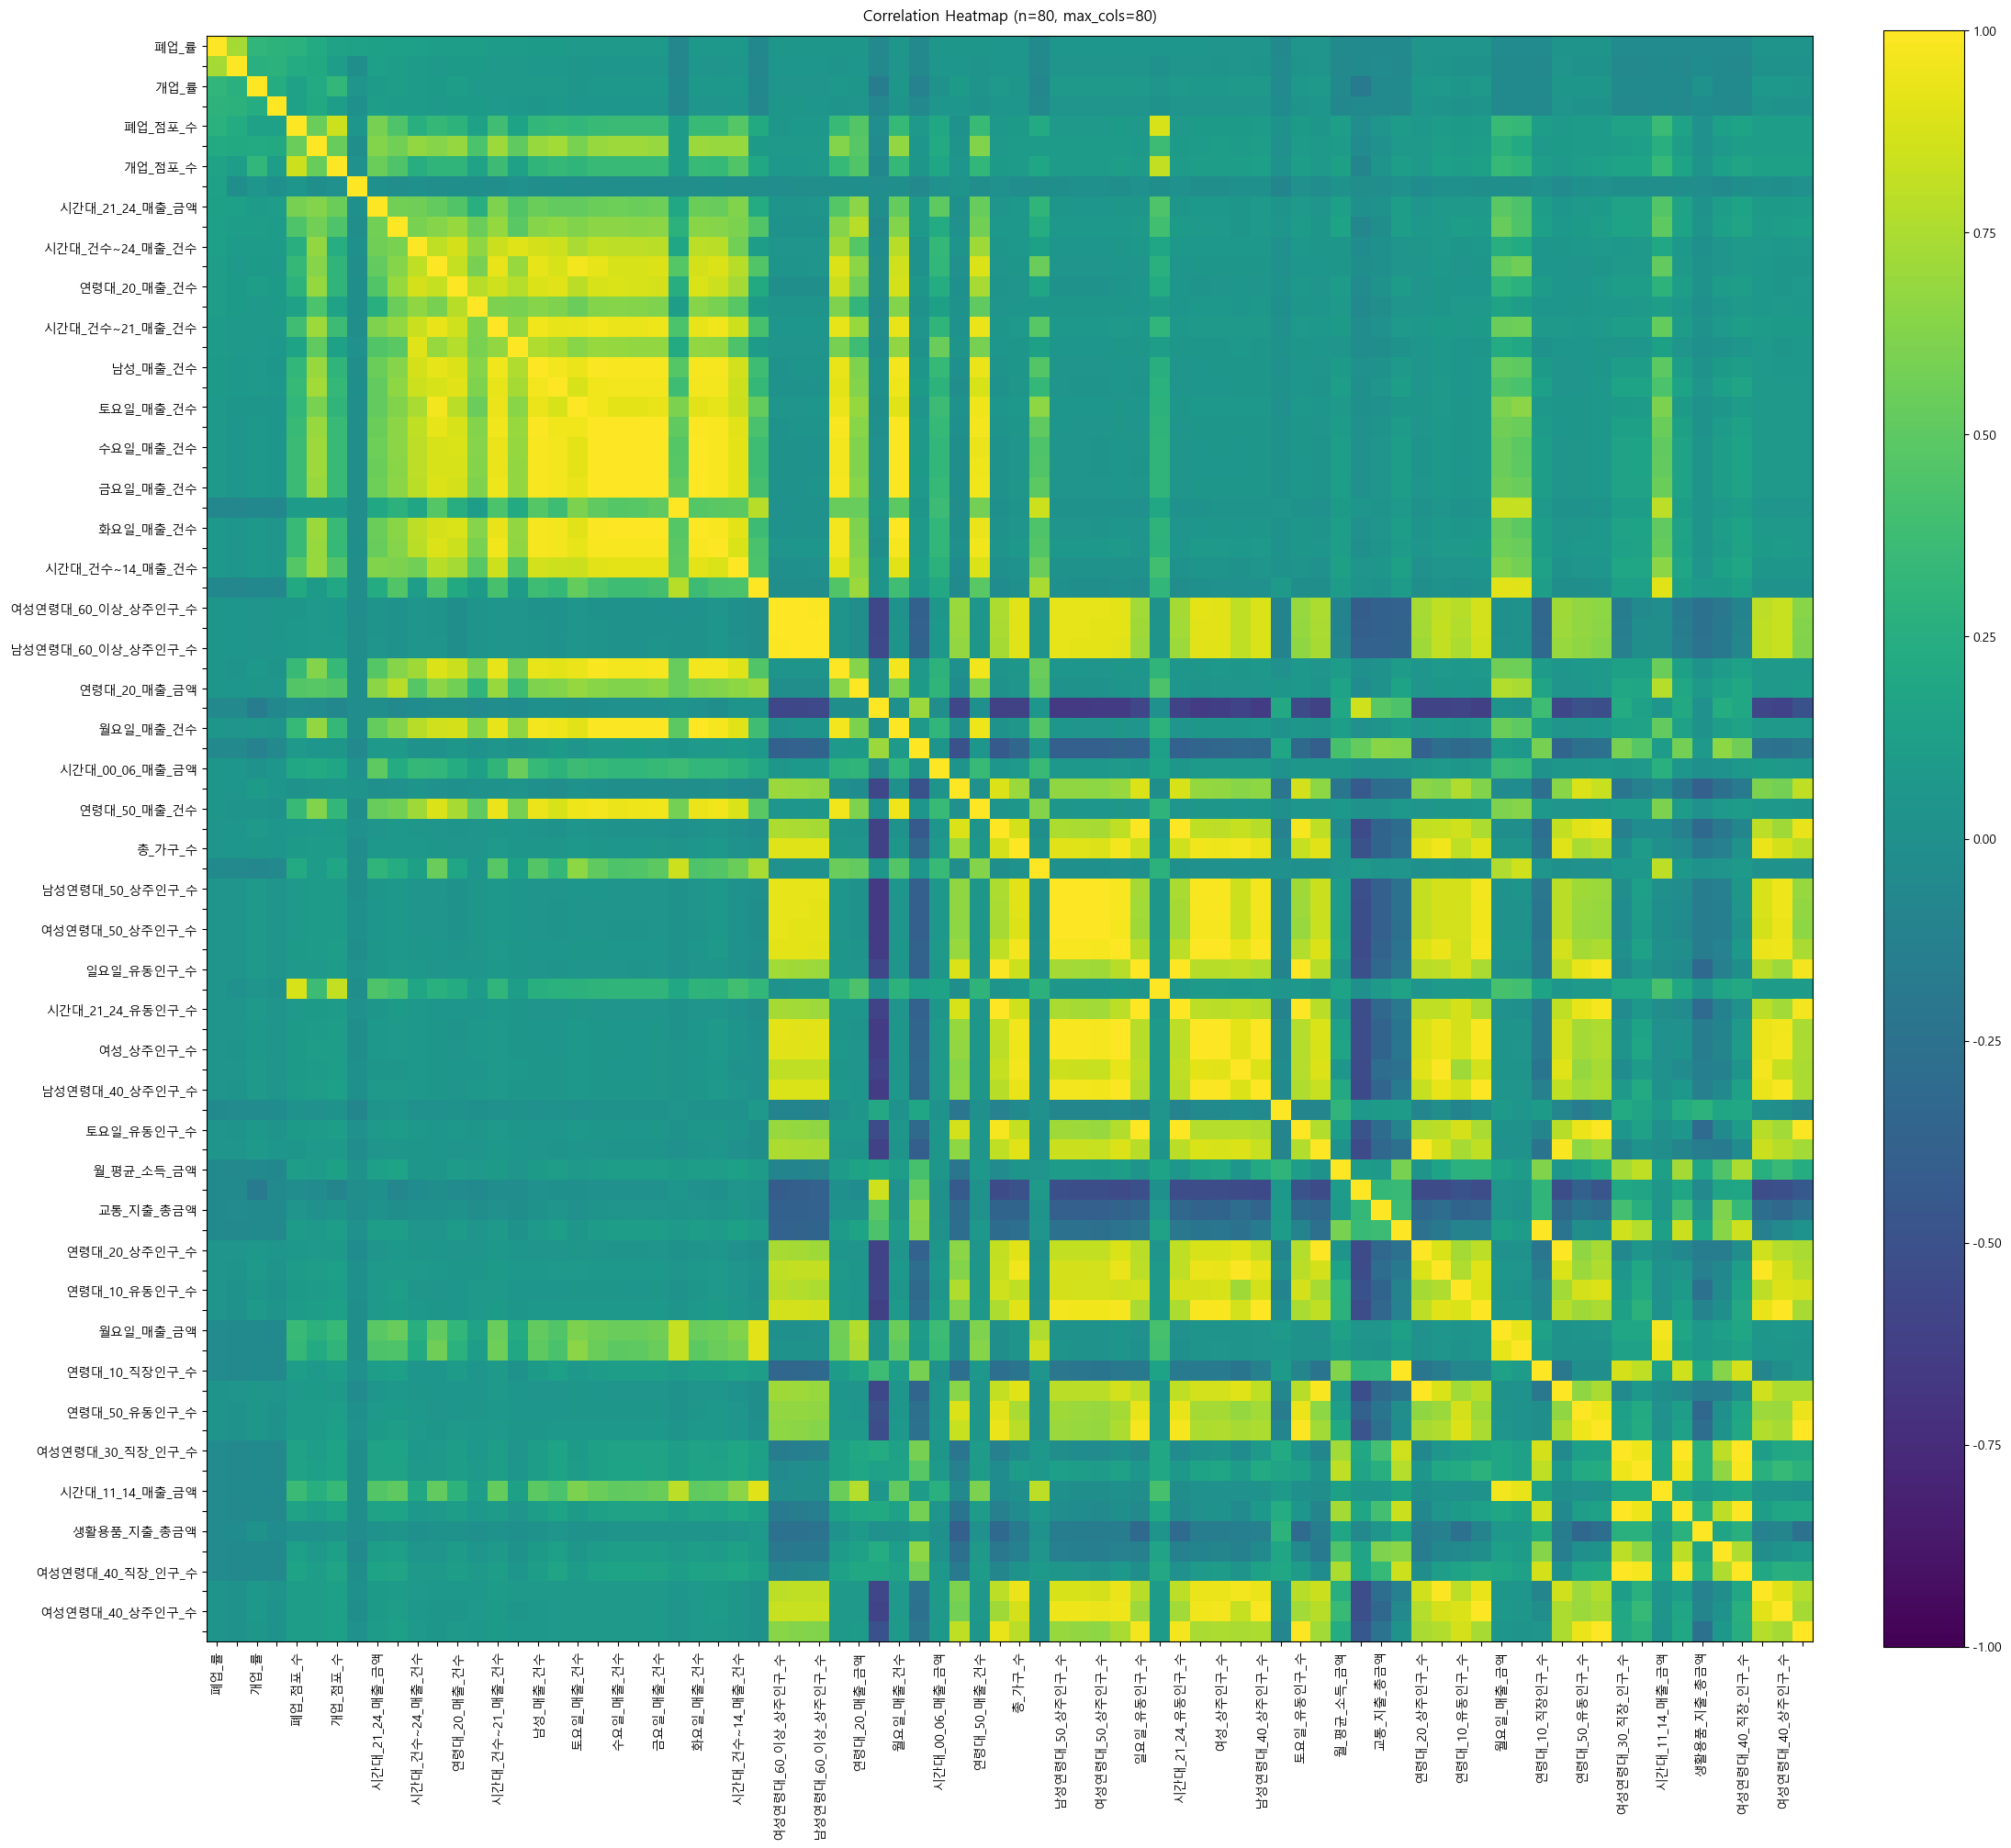

⚠️ |corr| ≥ 0.95 고상관 쌍 (일부):
  - 일요일_매출_건수 vs 토요일_매출_건수: 0.966
  - 시간대_건수~21_매출_건수 vs 남성_매출_건수: 0.957
  - 시간대_건수~21_매출_건수 vs 당월_매출_건수: 0.960
  - 시간대_건수~21_매출_건수 vs 연령대_40_매출_건수: 0.954
  - 남성_매출_건수 vs 연령대_30_매출_건수: 0.964
  - 남성_매출_건수 vs 당월_매출_건수: 0.985
  - 남성_매출_건수 vs 수요일_매출_건수: 0.977
  - 남성_매출_건수 vs 목요일_매출_건수: 0.977
  - 남성_매출_건수 vs 금요일_매출_건수: 0.980
  - 남성_매출_건수 vs 화요일_매출_건수: 0.974


In [230]:
# =========================
# Correlation Heatmap (matplotlib only)
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "Malgun Gothic"   # 윈도우 기본 한글 폰트
mpl.rcParams["axes.unicode_minus"] = False      # 마이너스 기호 깨짐 방지


# 타깃 컬럼명 (노트북에 이미 TARGET_CONT가 있다면 그 값을 사용)
TARGET = "폐업_률"
if "TARGET_CONT" in globals():
    TARGET = TARGET_CONT

def plot_corr_heatmap(df, max_cols=80, include_target=True):
    """
    df: DataFrame (이미 로드된 df)
    max_cols: 히트맵에 표시할 최대 컬럼 수 (너무 많으면 읽기 어렵기 때문에 제한)
    include_target: 타깃을 포함해서 '타깃과 상관 높은 순' 우선 선별
    """
    # 1) 수치형 컬럼만 사용
    num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
    if include_target and TARGET in df.columns and TARGET not in num_cols_all:
        # (혹시 object로 들어온 경우를 대비)
        try:
            df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
            if df[TARGET].dtype.kind in "ifc":
                num_cols_all.append(TARGET)
        except Exception:
            pass

    # (방어) 상수열 제거
    stable = [c for c in num_cols_all if df[c].nunique(dropna=True) > 1]

    # 2) 너무 많으면 컬럼 선별 (타깃 기반 → 상관 높은 순)
    cols = stable
    if len(stable) > max_cols:
        if include_target and TARGET in stable:
            # 타깃과의 상관 절대값 상위 (타깃 제외한 뒤 뽑고 타깃 포함)
            corr_with_t = df[stable].corr().abs()[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
            top = corr_with_t.head(max_cols - 1).index.tolist()
            cols = [TARGET] + top
        else:
            # 타깃이 없으면 분산 큰 순으로 선별
            var = df[stable].var().sort_values(ascending=False)
            cols = var.head(max_cols).index.tolist()

    # 3) 상관계수 계산 (피어슨)
    corr = df[cols].corr(method="pearson")

    # 4) 히트맵 그리기 (라벨 간격 조절)
    n = len(cols)
    fig_size = max(8, min(0.35 * n, 22))  # 너무 크지 않게 제한
    plt.figure(figsize=(fig_size, fig_size))
    im = plt.imshow(corr.values, vmin=-1, vmax=1, interpolation="nearest")
    plt.colorbar(im, fraction=0.046, pad=0.04)

    # 축 라벨 간격 줄이기
    step = max(1, n // 30)  # 대략 30개 정도만 라벨 보이게
    xlabels = [cols[i] if i % step == 0 else "" for i in range(n)]
    ylabels = [cols[i] if i % step == 0 else "" for i in range(n)]
    plt.xticks(ticks=np.arange(n), labels=xlabels, rotation=90)
    plt.yticks(ticks=np.arange(n), labels=ylabels)

    plt.title(f"Correlation Heatmap (n={n}, max_cols={max_cols})", pad=12)
    plt.tight_layout()
    plt.show()

    # 5) (선택) 고상관 경고 출력
    high_pairs = []
    thr = 0.95
    C = corr.values
    for i in range(n):
        for j in range(i+1, n):
            if np.isfinite(C[i, j]) and abs(C[i, j]) >= thr:
                high_pairs.append((cols[i], cols[j], C[i, j]))
    if high_pairs:
        print(f"⚠️ |corr| ≥ {thr} 고상관 쌍 (일부):")
        for a, b, v in high_pairs[:10]:
            print(f"  - {a} vs {b}: {v:.3f}")

# === 사용 예시 ===
# 전체 수치 컬럼 기준 러프 히트맵(최대 80개, 타깃 포함 우선 선별)
plot_corr_heatmap(df, max_cols=80, include_target=True)


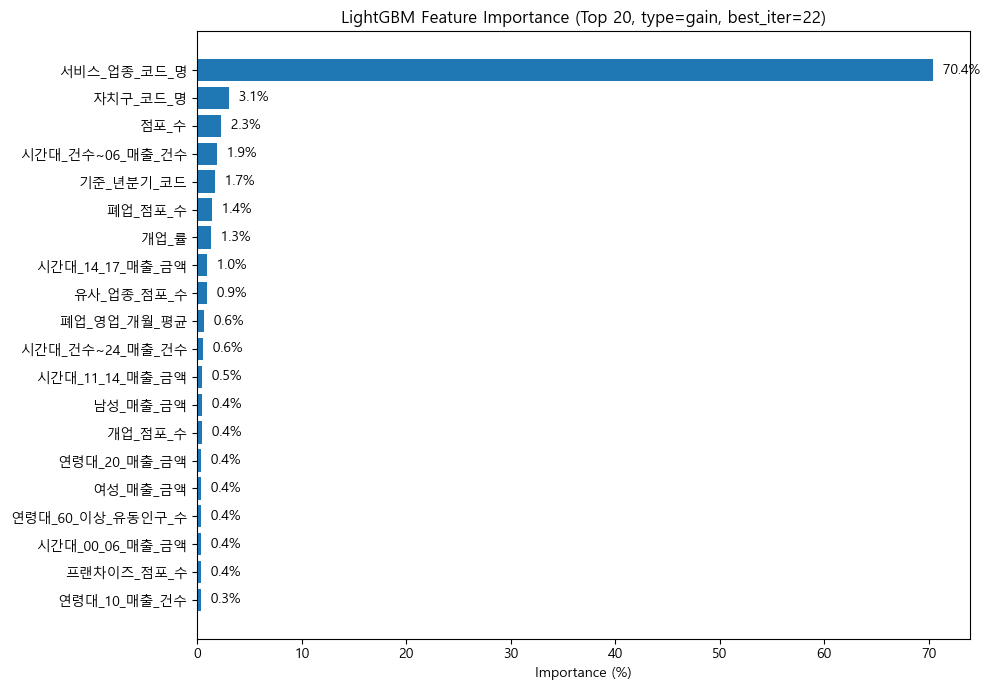

,feature,importance,value
134,서비스_업종_코드_명,45352.818225,70.415853
133,자치구_코드_명,1977.730477,3.070671
118,점포_수,1456.542347,2.261462
49,시간대_건수~06_매출_건수,1197.637768,1.859481
7,기준_년분기_코드,1070.414519,1.661951
128,폐업_점포_수,905.797429,1.406362
0,개업_률,866.662974,1.345601
43,시간대_14_17_매출_금액,613.147413,0.951987
109,유사_업종_점포_수,595.086050,0.923945
127,폐업_영업_개월_평균,416.707668,0.646990


In [231]:
# LightGBM Feature Importance (Top-N, matplotlib)
def plot_lgbm_importance(model, feature_names, top_n=20, importance_type="gain", normalize=True):
    """
    model          : 학습된 lgb.LGBMClassifier / LGBMRegressor
    feature_names  : X.columns
    top_n          : 표시할 상위 개수
    importance_type: "gain" 또는 "split"
    normalize      : 합계 100%로 정규화해 %로 표시할지 여부
    """
    # Booster 가져오기 (버전 호환)
    booster = getattr(model, "booster_", None) or getattr(model, "_Booster", None)
    assert booster is not None, "학습된 모델의 booster를 찾을 수 없습니다."

    best_iter = getattr(model, "best_iteration_", None)
    try:
        imp_raw = booster.feature_importance(importance_type=importance_type, iteration=best_iter)
    except TypeError:
        # 일부 버전에선 iteration 인자가 없음
        imp_raw = booster.feature_importance(importance_type=importance_type)

    imp_df = pd.DataFrame({"feature": list(feature_names), "importance": imp_raw})

    # 정규화(선택)
    if normalize and imp_df["importance"].sum() > 0:
        imp_df["value"] = 100 * imp_df["importance"] / imp_df["importance"].sum()
        xlab = "Importance (%)"
        fmt = "{:.1f}%"
    else:
        imp_df["value"] = imp_df["importance"]
        xlab = "Importance"
        fmt = "{:.0f}"

    # Top-N만 추려서 그래프 (barh는 내림차순 → 역순 정렬)
    top = (imp_df.sort_values("value", ascending=False)
                 .head(top_n)
                 .iloc[::-1])

    fig_h = max(5, 0.35 * len(top))   # 피처 개수에 비례해 높이 조정
    plt.figure(figsize=(10, fig_h))
    plt.barh(top["feature"], top["value"])
    title = f"LightGBM Feature Importance (Top {top_n}, type={importance_type}"
    if best_iter:
        title += f", best_iter={best_iter}"
    title += ")"
    plt.title(title)
    plt.xlabel(xlab)
    # 값 라벨
    for i, v in enumerate(top["value"]):
        plt.text(v, i, "  " + fmt.format(v), va="center")
    plt.tight_layout()
    plt.show()

    return top.iloc[::-1][["feature", "importance", "value"]]  # 상위부터 반환

# === 사용 예시 ===
# gain 기준 Top 20
imp_top20 = plot_lgbm_importance(model, X.columns, top_n=20, importance_type="gain", normalize=True)
display(imp_top20)